
# The AUREM library

**AUREM** acronym stands for: **AU**to **RE**gressive based pickers.

This python library is a collection of fast standard auto-regressive model-based seismic-phase pickers implemented in C language. At this stage the supported pickers are:

- _Akaike Information Criteria_ (AIC): as implemented in Maeda (1985)
- _Reciprocal Based picker_ (REC): as implemented in Madarshahian (2020)

In the following sections you'll see applications examples. Although both pickers work similarly and are easy to implement, the `REC` picker is particularly indicated for microseismicity studies.


## Setting up..

From `v1.1.0` the package is distributed on PyPI and a simple `pip install aurem` will do the job. The C library will be compiled at installation stage. Fell free to previously create a dedicated environment with `conda` or `pipenv`.
The dependencyies are the following:
```
- obspy >= 1.1.0
- numpy >= 1.18.1
- matplotlib >= 2.1.0
```

The package is compatible with `Python >= 3.5`

In [2]:
# --- Example with conda. Uncomment if needed
# !conda create -name aurem python=3.7
# !pip install aurem
# !conda activate aurem

%matplotlib inline
from aurem.pickers import REC, AIC
from obspy import read, UTCDateTime

## 1. The AIC picker

The pick is set where the minimum of the CF is reached

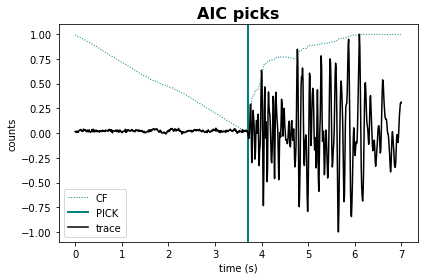

In [3]:
st = read()

# --- Pre Process
st.filter('highpass', freq=2, corners=4)
st.trim(st[0].stats.starttime + 1, UTCDateTime("2009-08-24T00:20:11"))

# --- Create Instance + picks
aicobj = AIC(st, channel="*Z") # the key-args are the same of obspy.Stream.select() method
aicobj.work()

# --- Extract
pt = aicobj.get_pick()
idx = aicobj.get_pick_index()

# --- Plot
# this is a fast wrapper over the customizable plot_aic() function in aurem.plotting module
aicobj.plot()

## 2. The REC picker

The pick is set where the minimum of the CF is reached

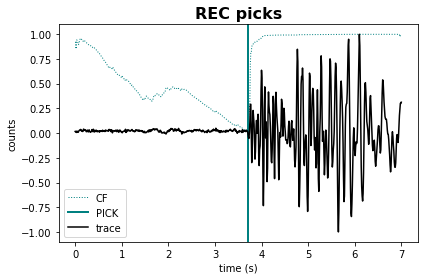

<AxesSubplot:title={'center':'REC picks'}, xlabel='time (s)', ylabel='counts'>

In [5]:
st = read()

# --- Pre Process
st.filter('highpass', freq=2, corners=4)
st.trim(st[0].stats.starttime + 1, UTCDateTime("2009-08-24T00:20:11"))

# --- Create Instance + picks
recobj = REC(st, channel="*Z") # the key-args are the same of obspy.Stream.select() method
recobj.work()

# --- Extract
pt = recobj.get_pick()
idx = recobj.get_pick_index()

# --- Plot
# this is a fast wrapper over the customizable plot_aic() function in aurem.plotting module
recobj.plot()


These pickers represent a fast yet effective way to precisely identify the transient onet. Such pickers tends to be more sensisitve on amplitude variation.


### References

- Maeda, Naoki. 1985. “A Method for Reading and Checking Phase Time in Auto-Processing System of Seismic Wave Data.” Zisin (Journal of the Seismological Society of Japan. 2nd Ser.) 38 (3): 365–79. https://doi.org/10.4294/zisin1948.38.3_365.

- Madarshahian, Ramin, Paul Ziehl, and Michael D. Todd. 2020. “Bayesian Estimation of Acoustic Emission Arrival Times for Source Localization.” In Model Validation and Uncertainty Quantification, Volume 3, 127–33. Springer.
